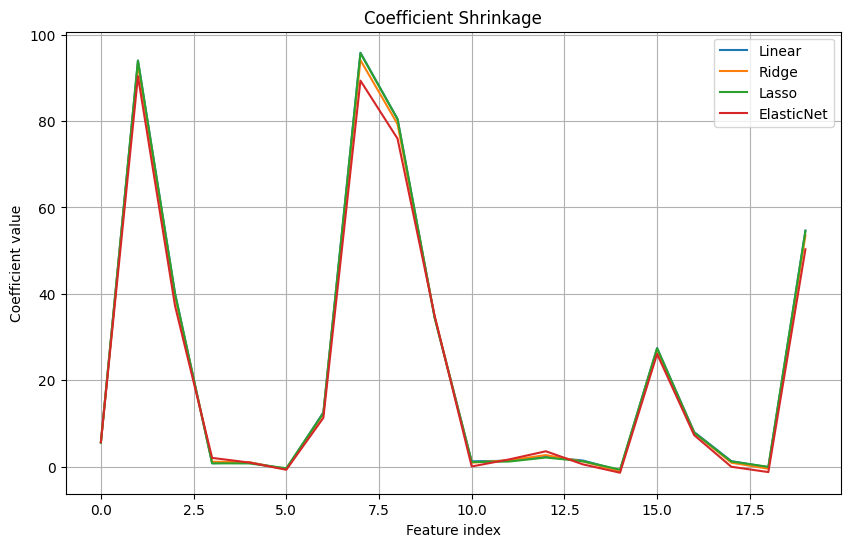

Linear MSE: 151.24
Ridge MSE: 159.00
Lasso MSE: 150.48
ElasticNet MSE: 235.94


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X, y, coef_true = make_regression(n_samples=100, n_features=20, n_informative=10,
                                   noise=10, coef=True, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = {
        "model": model,
        "mse": mse,
        "coef": model.coef_
    }

plt.figure(figsize=(10, 6))
for name in results:
    plt.plot(results[name]["coef"], label=name)
plt.title("Coefficient Shrinkage")
plt.xlabel("Feature index")
plt.ylabel("Coefficient value")
plt.legend()
plt.grid(True)
plt.show()

for name in results:
    print(f"{name} MSE: {results[name]['mse']:.2f}")